<a href="https://colab.research.google.com/github/MathPhysSim/ML-COFFEE-AAE/blob/master/Example_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lets mount google drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive"

 app		    dirname			     ML-Coffee
'Colab Notebooks'   Linear_Regression_ML_101.ipynb   ML-Coffee_CERN


In [0]:
dir_name = "/content/drive/My Drive/ML_Coffee_CERN"

In [4]:
!mkdir dirname

mkdir: cannot create directory ‘dirname’: File exists


In [5]:
!ls "/content/drive/My Drive"

 app		    dirname			     ML-Coffee
'Colab Notebooks'   Linear_Regression_ML_101.ipynb   ML-Coffee_CERN


In [0]:
import os
os.chdir("/content/drive/My Drive/ML-Coffee_CERN")

In [7]:
os.getcwd()

'/content/drive/My Drive/ML-Coffee_CERN'

In [8]:
! if test -d my_module; then rm -R my_module; fi
!git clone https://github.com/MathPhysSim/ML-COFFE-AAE.git my_module

Cloning into 'my_module'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 117 (delta 62), reused 66 (delta 28), pack-reused 0
Receiving objects: 100% (117/117), 20.69 KiB | 1.59 MiB/s, done.
Resolving deltas: 100% (62/62), done.


Using TensorFlow backend.


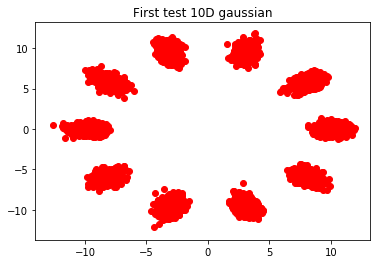

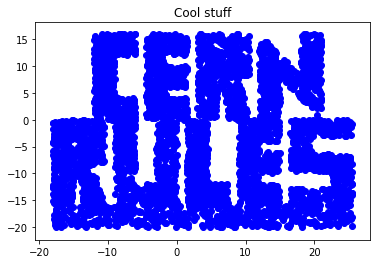

In [9]:
import my_module
import my_module.helpers as helpers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Check the availability of GPU

In [0]:
from tensorflow.python.client import device_lib

In [11]:
!cat /proc/cpuinfo
!cat /proc/meminfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power ma

In [12]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [13]:
import tensorflow as tf
import timeit

# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.device('/cpu:0'):
  random_image_cpu = tf.random_normal((100, 100, 100, 3))
  net_cpu = tf.layers.conv2d(random_image_cpu, 32, 7)
  net_cpu = tf.reduce_sum(net_cpu)

with tf.device('/device:GPU:0'):
  random_image_gpu = tf.random_normal((100, 100, 100, 3))
  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)
  net_gpu = tf.reduce_sum(net_gpu)

sess = tf.Session(config=config)

# Ensure that TF can detect the GPU.
try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

def cpu():
  sess.run(net_cpu)
  
def gpu():
  sess.run(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

sess.close()

W0705 10:07:11.406193 140223021377408 deprecation.py:323] From <ipython-input-13-fdbcd0911609>:10: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0705 10:07:11.417914 140223021377408 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.0086356140000134
GPU (s):
0.09535311199942953
GPU speedup over CPU: 31x


W0705 10:07:24.971445 140223021377408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 10:07:24.975984 140223021377408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 10:07:24.987055 140223021377408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 10:07:25.152209 140223021377408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 10:07:25.159931 140223021377408 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2002      
Total params: 1,788,002
Trainable params: 1,788,002
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              3000      
_________________________________________________________________


W0705 10:07:27.824172 140223021377408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.765853, acc: 20.31%] [G acc: 0.812500, mse: 0.231854]
Save imagegrid as: /content/drive/My Drive/ML-Coffee_CERN/images/SSAAE/0.png


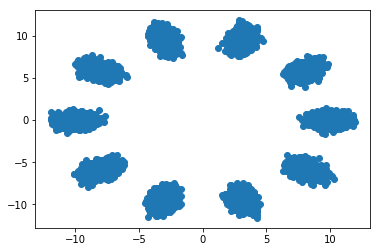

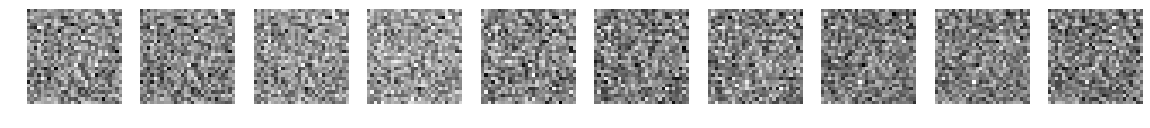

Save latent map as: /content/drive/My Drive/ML-Coffee_CERN/images/SSAAE/map_0.png


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


400 [D loss: 0.402612, acc: 89.06%] [G acc: 0.156250, mse: 0.057869]
800 [D loss: 0.413096, acc: 84.38%] [G acc: 0.187500, mse: 0.065073]
(10000, 28, 28)
new


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'bandwidth': 0.001}
Log Likelihood
-22950660.681000102


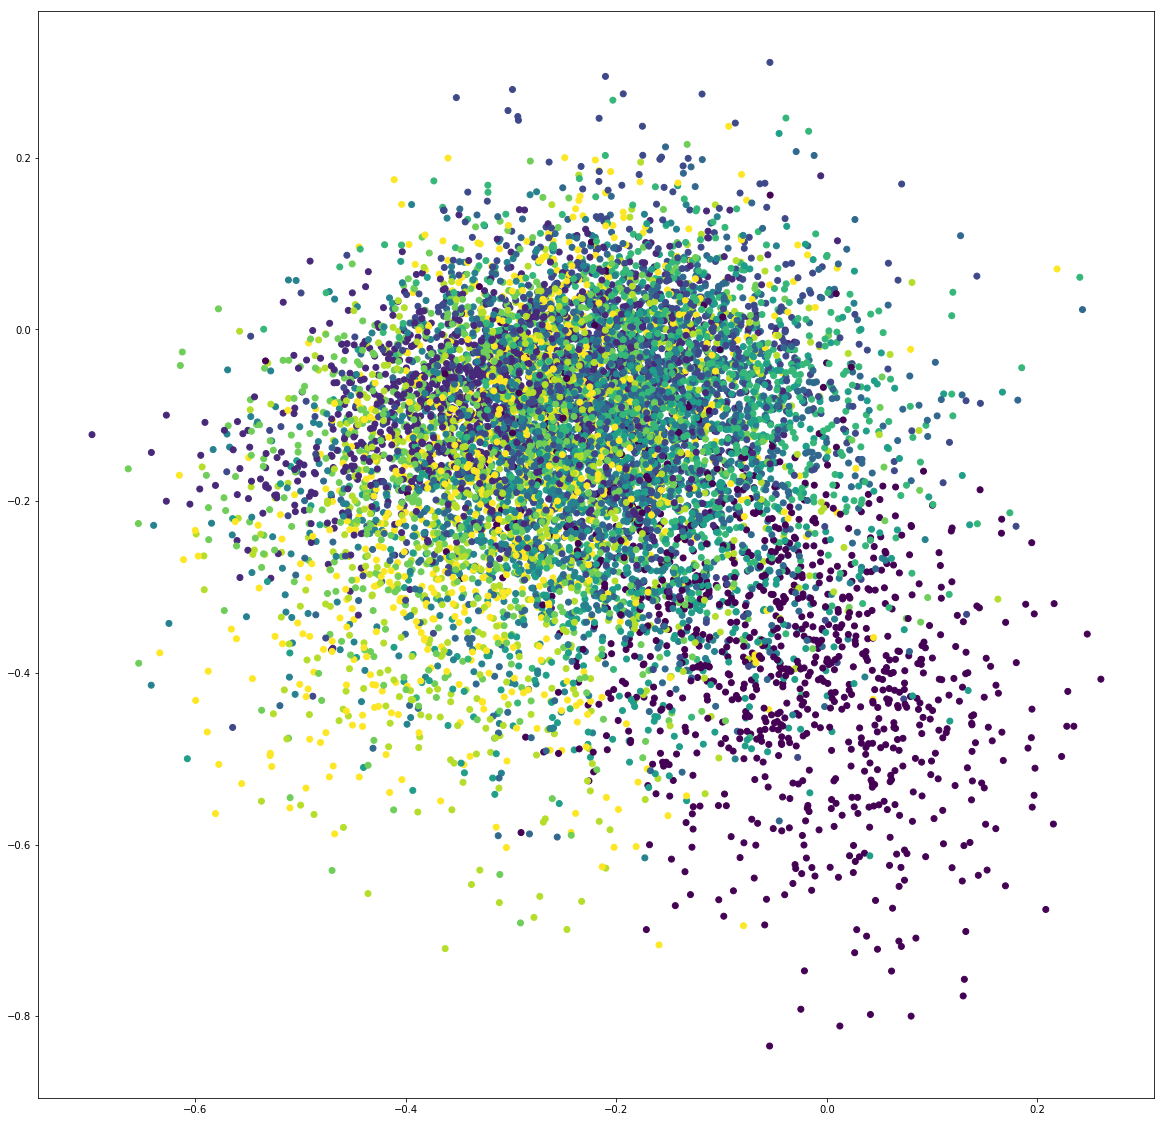

In [14]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
idx_unlabel = np.random.randint(0, x_train.shape[0], 20000)
y_train[idx_unlabel] = 10
x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.

# Load classes from module and start the training
ann = my_module.SSAAE(type='no so cool')
vecs, b = ann.generateRandomVectors(1000 * list(range(10)))
plt.scatter(vecs[:, 0], vecs[:, 1])
ann.train(x_train, y_train, x_test, y_test, epochs=int(1e3), 
          save_interval = 2000, batch_size=32)

# Print the results
vecs, b = ann.generateRandomVectors(1000 * list(range(10)))
generated = ann.decoder.predict(vecs)
print(generated.shape)
L = helpers.approximateLogLiklihood(generated, x_test)
print("Log Likelihood")
print(L)

In [0]:
from google.colab import files

files.download('/content/drive/My Drive/ML-Coffee_CERN/images/SSAAE/0.png')